## Basic Knowlege Graph

In [8]:
import os
import sys

import pandas as pd

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))
from data_processing import DataProcessing
from feature_extraction import SpacyFeatureExtraction

In [6]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Data

In [7]:
base_data_path = os.path.join(notebook_dir, '../data')
base_prediction_path = os.path.join(base_data_path, 'prediction_logs/batch_1-prediction/batch_1-from_df.csv')
predictions_df = DataProcessing.load_from_file(base_prediction_path, 'csv')
predictions_df = predictions_df.head(3)
predictions_df

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,JPMorgan Chase forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.,1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,1
1,"On August 21, 2024, Bank of America speculates the revenue at Microsoft will likely increase.",1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,2
2,"Citigroup predicts on 2024-08-21, the operating income at Alphabet may rise.",1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,3


## Extract Properties

In [14]:
spacy_fe = SpacyFeatureExtraction(predictions_df, 'Base Sentence')
disable_components = []
prediction_extracted_features = spacy_fe.extract_features(disable_components)
prediction_extracted_features

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


3it [00:00, 405.13it/s]

Spacy Doc (0):  JPMorgan Chase forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.
Spacy Doc (1):  On August 21, 2024, Bank of America speculates the revenue at Microsoft will likely increase.
Spacy Doc (2):  Citigroup predicts on 2024-08-21, the operating income at Alphabet may rise.


({'ADJ_1',
  'ADP_1',
  'ADP_2',
  'ADP_3',
  'ADV_1',
  'AUX_1',
  'DET_1',
  'NOUN_1',
  'NOUN_2',
  'NUM_1',
  'NUM_2',
  'NUM_3',
  'PROPN_1',
  'PROPN_2',
  'PROPN_3',
  'PROPN_4',
  'PUNCT_1',
  'PUNCT_2',
  'PUNCT_3',
  'SCONJ_1',
  'SYM_1',
  'SYM_2',
  'VERB_1',
  'VERB_2'},
 [[('JPMorgan', 'PROPN_1'),
   ('Chase', 'PROPN_2'),
   ('forecasts', 'VERB_1'),
   ('that', 'SCONJ_1'),
   ('the', 'DET_1'),
   ('net', 'ADJ_1'),
   ('profit', 'NOUN_1'),
   ('at', 'ADP_1'),
   ('Amazon', 'PROPN_3'),
   ('potentially', 'ADV_1'),
   ('decrease', 'NOUN_2'),
   ('in', 'ADP_2'),
   ('Q3', 'PROPN_4'),
   ('of', 'ADP_3'),
   ('2027', 'NUM_1'),
   ('.', 'PUNCT_1')],
  [('On', 'ADP_1'),
   ('August', 'PROPN_1'),
   ('21', 'NUM_1'),
   (',', 'PUNCT_1'),
   ('2024', 'NUM_2'),
   (',', 'PUNCT_2'),
   ('Bank', 'PROPN_2'),
   ('of', 'ADP_2'),
   ('America', 'PROPN_3'),
   ('speculates', 'VERB_1'),
   ('the', 'DET_1'),
   ('revenue', 'NOUN_1'),
   ('at', 'ADP_3'),
   ('Microsoft', 'PROPN_4'),
   ('will

In [30]:
prediction_extracted_features_df = DataProcessing.convert_tags_entities_to_dataframe(prediction_extracted_features[0], prediction_extracted_features[1])
prediction_extracted_features_df

3it [00:00, 2946.82it/s]


,ADV_1,VERB_2,SYM_1,PUNCT_2,PROPN_1,NOUN_1,ADP_2,PUNCT_1,ADP_1,NUM_1,ADJ_1,PROPN_2,PROPN_3,NOUN_2,VERB_1,NUM_3,SYM_2,PROPN_4,ADP_3,DET_1,PUNCT_3,NUM_2,SCONJ_1,AUX_1
0,potentially,NaN,NaN,NaN,JPMorgan,profit,in,.,at,2027,net,Chase,Amazon,decrease,forecasts,NaN,NaN,Q3,of,the,NaN,NaN,that,NaN
1,likely,increase,NaN,",",August,revenue,of,",",On,21,NaN,Bank,America,NaN,speculates,NaN,NaN,Microsoft,at,the,.,2024,NaN,will
2,NaN,rise,-,.,Citigroup,operating,at,",",on,2024,NaN,Alphabet,NaN,income,predicts,21,-,NaN,NaN,the,NaN,08,NaN,may


In [20]:
import spacy

nlp = spacy.load("en_core_web_md")
doc = nlp("Credit and mortgage account holders must submit their requests")
doc = nlp("JPMorgan Chase forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.")

span = doc[doc[4].left_edge.i : doc[4].right_edge.i+1]
with doc.retokenize() as retokenizer:
    retokenizer.merge(span)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)


JPMorgan PROPN compound Chase
Chase PROPN nsubj forecasts
forecasts VERB ROOT forecasts
that SCONJ mark decrease
the DET det profit
net ADJ amod profit
profit NOUN nsubj decrease
at ADP prep profit
Amazon PROPN pobj at
potentially ADV advmod decrease
decrease VERB ccomp forecasts
in ADP prep decrease
Q3 PROPN pobj in
of ADP prep Q3
2027 NUM pobj of
. PUNCT punct forecasts


In [ ]:
prediction_extracted_features_df.loc[0, ['PROPN_1', 'PROPN_2', 'PROPN_3', 'VERB_1', 'NOUN_1']]

PROPN_1     JPMorgan
PROPN_2        Chase
PROPN_3       Amazon
VERB_1     forecasts
Name: 0, dtype: object

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
# Initialize a directed graph
G = nx.DiGraph()

# Add edges to the graph based on predefined source, target and relations
for _, row in prediction_extracted_features_df.iterrows():
    source = row['PROPN_1']
    target = row['PROPN_3']
    relation = row['VERB_1']
    outcome = row['NOUN_1']

    G.add_node(source)
    G.add_node(target)
    G.add_node(outcome)
    G.add_edge(source, outcome, relation=relation)
    G.add_edge(outcome, target)

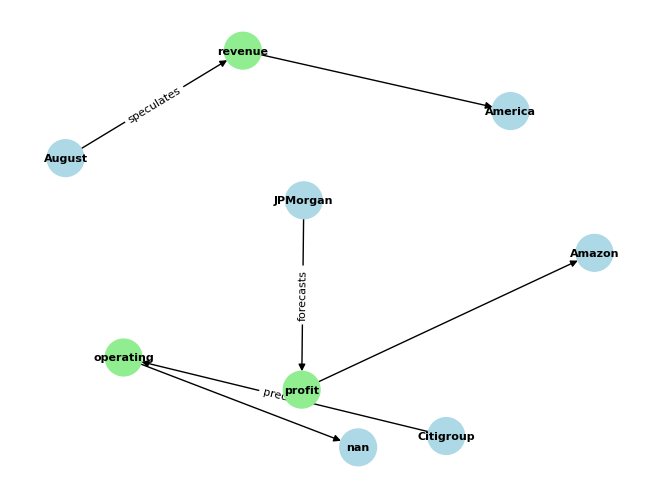

In [42]:
# Visualize the knowledge graph with colored nodes
# Calculate node degrees
node_degrees = dict(G.degree)
# Assign colors based on node degrees
node_colors = ['lightgreen' if degree == max(node_degrees.values()) else 'lightblue' for degree in node_degrees.values()]

# Adjust the layout for better spacing
pos = nx.spring_layout(G, seed=42, k=1.5)

labels = nx.get_edge_attributes(G, 'relation')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=node_colors, font_size=8, arrowsize=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
plt.show()